# Loading PICKLED Files

In [1]:
# load in all of the libraries we'll be using for our analysis and set our random seed for reproduceability 

from datetime import datetime as dt 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import holidays

np.random.seed(17)

In [3]:
# read in our pickled dataframes created in the previous script 

import pickle

pickle_off = open("Weather.pickle","rb")
PhillyWeatherPickle = pickle.load(pickle_off)

In [4]:
PhillyWeatherPickle.head()

,Date,temperature,precip_intensity,precip_probability,wind_speed,humidity,mean_temperature,temperature6am,temperatureNoon,temperature6pm,...,summary_Possible Drizzle and Humid,summary_Possible Flurries,summary_Possible Light Rain,summary_Possible Light Rain and Humid,summary_Possible Light Snow,summary_Rain,summary_Rain and Humid,summary_Rain and Windy,summary_Snow,summary_Windy
0,2018-10-01,63.2,0,0,1.59,0.81,70.4629,61.41,76.3,79.39,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-02,68.41,0,0,2.32,0.92,70.3371,66.77,78.05,80.33,...,0,0,0,0,0,0,0,0,0,0
2,2018-10-03,65.33,0.0686,0.92,3.72,0.97,69.0888,64.79,71.29,77.14,...,0,0,0,0,0,1,0,0,0,0
3,2018-10-04,65.01,0,0,1.79,0.77,71.2529,62.8,72.78,82.43,...,0,0,0,0,0,0,0,0,0,0
4,2018-10-05,73.57,0.0002,0.02,2.6,0.9,66.0721,64.93,63.89,67.52,...,0,0,0,0,0,0,0,0,0,0


In [5]:
PhillyWeatherPickle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1711
Data columns (total 43 columns):
Date                                     1710 non-null datetime64[ns]
temperature                              1710 non-null object
precip_intensity                         1710 non-null object
precip_probability                       1710 non-null object
wind_speed                               1710 non-null object
humidity                                 1710 non-null object
mean_temperature                         1710 non-null object
temperature6am                           1710 non-null object
temperatureNoon                          1710 non-null object
temperature6pm                           1710 non-null object
mean_precip_chance                       1710 non-null object
cumulative_rain                          1710 non-null object
mean_wind_speed                          1710 non-null object
mean_humidity                            1710 non-null object
Year             

In [7]:
pickle_off_bike = open("Bikes.pickle","rb")
BikesPickle = pickle.load(pickle_off_bike)
BikesPickle

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,start_station,start_station_id,start_time,trip_id,trip_route_category,Date,Year,Month,Day
0,11908,standard,30,39.93750,-75.1875,3063.0,NaN,2018-10-01 00:33:00,Indego30,30.0,...,-75.1875,3038.0,NaN,2018-10-01 00:03:00,299955254,One Way,2018-10-01,2018,10,0
1,05382,standard,7,39.93750,-75.1875,3064.0,NaN,2018-10-01 00:13:00,Indego30,30.0,...,-75.1875,3032.0,NaN,2018-10-01 00:06:00,299955253,One Way,2018-10-01,2018,10,0
2,11930,standard,6,39.93750,-75.1875,3064.0,NaN,2018-10-01 00:13:00,Indego30,30.0,...,-75.1875,3032.0,NaN,2018-10-01 00:07:00,299955252,One Way,2018-10-01,2018,10,0
3,05225,standard,6,39.93750,-75.1875,3007.0,NaN,2018-10-01 00:20:00,Indego30,30.0,...,-75.1875,3025.0,NaN,2018-10-01 00:14:00,299955251,One Way,2018-10-01,2018,10,0
4,03379,standard,6,39.96875,-75.1875,3035.0,NaN,2018-10-01 00:23:00,Indego30,30.0,...,-75.1875,3029.0,NaN,2018-10-01 00:17:00,299955250,One Way,2018-10-01,2018,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119554,2523,NaN,480,39.93750,-75.1250,NaN,3028.0,2015-06-30 23:33:00,Indego30,30.0,...,-75.1250,NaN,3026.0,2015-06-30 23:25:00,4150090,One Way,2015-06-30,2015,6,1
119555,2629,NaN,960,39.93750,-75.1875,NaN,3025.0,2015-06-30 23:49:00,Indego30,30.0,...,-75.1875,NaN,3022.0,2015-06-30 23:33:00,4150097,One Way,2015-06-30,2015,6,1
119556,3689,NaN,420,39.93750,-75.1875,NaN,3045.0,2015-06-30 23:48:00,Indego30,30.0,...,-75.1875,NaN,3023.0,2015-06-30 23:41:00,4150099,One Way,2015-06-30,2015,6,1
119557,3709,NaN,480,39.93750,-75.1875,NaN,3045.0,2015-06-30 23:56:00,Indego30,30.0,...,-75.1250,NaN,3026.0,2015-06-30 23:48:00,4150100,One Way,2015-06-30,2015,6,1


# EDA

In [6]:
# get a count of the number of rides per day (based on the date during the end time of the ride)

Daily_count = BikesPickle.groupby('Date')[['end_time']].count()

In [7]:
Daily_count

,end_time
Date,
2015-04-23,398
2015-04-24,723
2015-04-25,1108
2015-04-26,1277
2015-04-27,809
...,...
2019-12-27,1318
2019-12-28,1000
2019-12-29,543


In [8]:
# merge this count dataframe with our weather dataframe 

PhillyWeatherCount = pd.merge(PhillyWeatherPickle, Daily_count, how = 'inner', 
                              left_on = PhillyWeatherPickle['Date'].dt.date, right_on = 'Date')

In [9]:
PhillyWeatherCount = PhillyWeatherCount.rename(columns = {'end_time' : 'Count'})

In [10]:
PhillyWeatherCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   1710 non-null   datetime64[ns]
 1   temperature                            1710 non-null   object        
 2   precip_intensity                       1710 non-null   object        
 3   precip_probability                     1710 non-null   object        
 4   wind_speed                             1710 non-null   object        
 5   humidity                               1710 non-null   object        
 6   mean_temperature                       1710 non-null   object        
 7   temperature6am                         1710 non-null   object        
 8   temperatureNoon                        1710 non-null   object        
 9   temperature6pm                         1710 non-null   object  

In [11]:
PhillyWeatherCount.head()

,Date,temperature,precip_intensity,precip_probability,wind_speed,humidity,mean_temperature,temperature6am,temperatureNoon,temperature6pm,...,summary_Possible Flurries,summary_Possible Light Rain,summary_Possible Light Rain and Humid,summary_Possible Light Snow,summary_Rain,summary_Rain and Humid,summary_Rain and Windy,summary_Snow,summary_Windy,Count
0,2018-10-01,63.2,0,0,1.59,0.81,70.4629,61.41,76.3,79.39,...,0,0,0,0,0,0,0,0,0,2784
1,2018-10-02,68.41,0,0,2.32,0.92,70.3371,66.77,78.05,80.33,...,0,0,0,0,0,0,0,0,0,2794
2,2018-10-03,65.33,0.0686,0.92,3.72,0.97,69.0888,64.79,71.29,77.14,...,0,0,0,0,1,0,0,0,0,2811
3,2018-10-04,65.01,0,0,1.79,0.77,71.2529,62.8,72.78,82.43,...,0,0,0,0,0,0,0,0,0,2478
4,2018-10-05,73.57,0.0002,0.02,2.6,0.9,66.0721,64.93,63.89,67.52,...,0,0,0,0,0,0,0,0,0,2643


In [12]:
m , b = np.polyfit(PhillyWeatherCount['mean_temperature'].astype(float).values , PhillyWeatherCount['Count'].astype(float).values , 1)

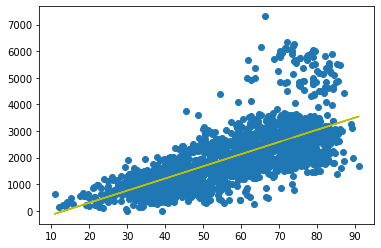

In [13]:
# Very clear positive trend between temperature and number of rides even if there is a fairly siginificant variance to the data

plt.scatter(PhillyWeatherCount['mean_temperature'], PhillyWeatherCount['Count'])

plt.plot(PhillyWeatherCount['mean_temperature'], PhillyWeatherCount['mean_temperature'] * m + b, color = 'y')

In [14]:
# for every one degree increase we're looking at an average increase of 46 rides 

m

45.78245252011727

In [15]:
quick_linear_model = linear_model.LinearRegression()

In [16]:
quick_linear_model.fit(PhillyWeatherCount['mean_temperature'].astype(float).values.reshape(-1,1) ,
                       PhillyWeatherCount['Count'].astype(float).values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Like mentioned earlier there is variability in the data leading to a low r^2 value but the trend is still visible none the less 

quick_linear_model.score(PhillyWeatherCount['mean_temperature'].astype(float).values.reshape(-1,1) , 
                         PhillyWeatherCount['Count'].astype(float).values.reshape(-1,1))

0.4710762637175355

# Observation : all days exceeding count of 5000 were 60 degrees or warmer

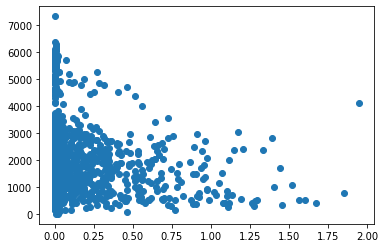

In [18]:
# stronger correlation for chance of rain than actual amount of rain
# (large spread in data for days with no rain, seeing as with the absence of rain many other factors play a larger role)

plt.scatter(PhillyWeatherCount['cumulative_rain'], PhillyWeatherCount['Count'])

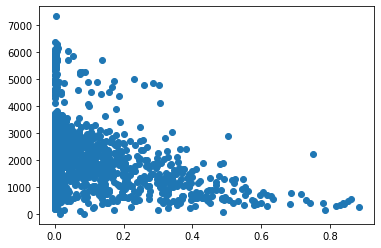

In [19]:
plt.scatter(PhillyWeatherCount['mean_precip_chance'], PhillyWeatherCount['Count'])

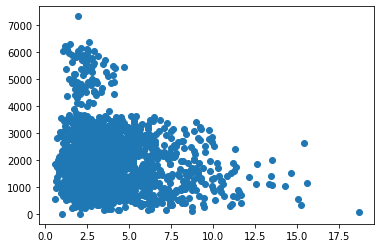

In [20]:
# Virtually no correlation between wind speeds and number of rides 

plt.scatter(PhillyWeatherCount['mean_wind_speed'], PhillyWeatherCount['Count'])

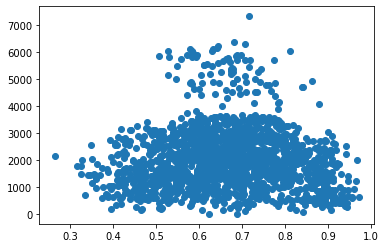

In [21]:
# no correlation between humidity and number of rides 

plt.scatter(PhillyWeatherCount['mean_humidity'], PhillyWeatherCount['Count'])

In [22]:
PhillyWeatherCount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   1710 non-null   datetime64[ns]
 1   temperature                            1710 non-null   object        
 2   precip_intensity                       1710 non-null   object        
 3   precip_probability                     1710 non-null   object        
 4   wind_speed                             1710 non-null   object        
 5   humidity                               1710 non-null   object        
 6   mean_temperature                       1710 non-null   object        
 7   temperature6am                         1710 non-null   object        
 8   temperatureNoon                        1710 non-null   object        
 9   temperature6pm                         1710 non-null   object  

In [23]:
us_holidays = holidays.UnitedStates()

PhillyWeatherCount['Holiday'] = PhillyWeatherCount.apply(lambda x: 1 if x.Date in us_holidays else 0, axis = 1)

<BarContainer object of 1710 artists>

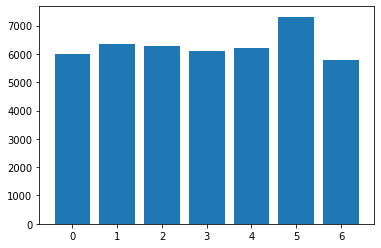

In [24]:
# fairly constant number of rides throughout week with slightly greater amount on Saturdays

plt.bar(PhillyWeatherCount['Day'], PhillyWeatherCount['Count'])

<BarContainer object of 1710 artists>

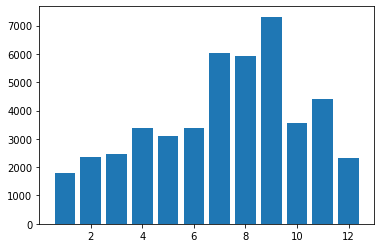

In [25]:
# July, August and September clearly have greatest amounts of rides 

plt.bar(PhillyWeatherCount['Month'], PhillyWeatherCount['Count'])

<BarContainer object of 1710 artists>

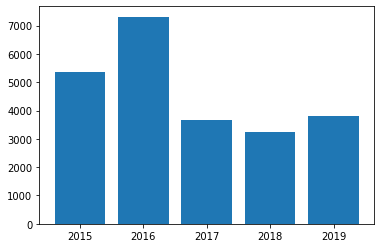

In [26]:
# Strong growth from 2015 to 2016 but struggles over the span from 2017-2019

plt.bar(PhillyWeatherCount['Year'], PhillyWeatherCount['Count'])

<BarContainer object of 1710 artists>

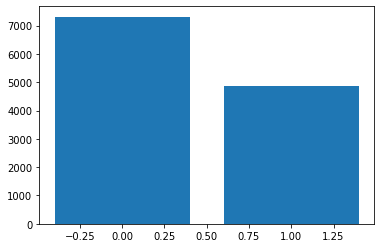

In [27]:
plt.bar(PhillyWeatherCount['Holiday'], PhillyWeatherCount['Count'])

In [28]:
PhillyWeatherCount['Holiday'].sum()

52

In [29]:
BikesPickle['passholder_type'].unique()

[Indego30, Walk-up, Day Pass, Indego365, IndegoFlex, One Day Pass, Two Day Pass, NaN]
Categories (7, object): [Indego30, Walk-up, Day Pass, Indego365, IndegoFlex, One Day Pass, Two Day Pass]

In [30]:
# Number of day passes purchased is much greater on weekends

BikesPickle[BikesPickle['passholder_type'] == 'Day Pass'].groupby('Day')[['passholder_type']].count()

,passholder_type
Day,
0,18086
1,14983
2,15737
3,16162
4,21530
5,46543
6,35663


In [31]:
# Number of rides for subscription holders is much greater during the week 

BikesPickle[BikesPickle['passholder_type'] == 'Indego30'].groupby('Day')[['passholder_type']].count()

,passholder_type
Day,
0,403885
1,441231
2,451070
3,431428
4,416693
5,283572
6,261776


In [32]:
BikesPickle[BikesPickle['passholder_type'] == 'Indego365'].groupby('Day')[['passholder_type']].count()

,passholder_type
Day,
0,38247
1,42902
2,42990
3,41104
4,38970
5,22890
6,20573


In [33]:
# looking at the number of rides per bike could be beneficial to help see when bikes are on the verge of being to worn and damaged to use

pd.DataFrame(BikesPickle.bike_id.value_counts())

,bike_id
2679,3580
2706,3370
5351,3334
6725,3282
3724,3274
...,...
3560,1
03722,1
14635,1
11914,1


In [34]:
print(BikesPickle.groupby('bike_id')['Date'].get_group('2679').min())

2015-07-20


In [35]:
BikesPickle.groupby('bike_id')['duration'].get_group('3690').sum()/60

5956.0

In [36]:
# simple function can be used to get the yearly break down of rides by bike ID along with total hourly usage 

def BikeUsageReport(ID):
    print("Bike introduction date {}".format(BikesPickle.groupby('bike_id')['Date'].get_group(ID).min()))
    print("Total Trips {}".format(BikesPickle[BikesPickle['bike_id'] ==  ID].bike_id.count()))
    print("Trips in 2015 {}".format(BikesPickle[(BikesPickle['bike_id'] ==  ID) & (BikesPickle['Year'] == 2015)].bike_id.count()))
    print("Trips in 2016 {}".format(BikesPickle[(BikesPickle['bike_id'] ==  ID) & (BikesPickle['Year'] == 2016)].bike_id.count()))
    print("Trips in 2017 {}".format(BikesPickle[(BikesPickle['bike_id'] ==  ID) & (BikesPickle['Year'] == 2017)].bike_id.count()))
    print("Trips in 2018 {}".format(BikesPickle[(BikesPickle['bike_id'] ==  ID) & (BikesPickle['Year'] == 2018)].bike_id.count()))
    print("Trips in 2019 {}".format(BikesPickle[(BikesPickle['bike_id'] ==  ID) & (BikesPickle['Year'] == 2019)].bike_id.count()))
    print("Total hours of usage {}".format(BikesPickle.groupby('bike_id')['duration'].get_group(str(ID)).sum()/60))
    
BikeUsageReport(3690)

Bike introduction date 2015-04-25
Total Trips 3186
Trips in 2015 379
Trips in 2016 1093
Trips in 2017 757
Trips in 2018 353
Trips in 2019 604
Total hours of usage 5956.0


In [37]:
# adding a column calculating the amount of time a given ride went over the alloted time could help for calculating the amount of
# revenue brought in this way as well as what characteristics are related to rides going over the alloted time 

def OverDuration(duration, plan_type):
    threshold = 0
    if plan_type in ['One Day Pass', 'Two Day Pass', 'Day Pass' 'Walk Up']:
        threshold += 30
    elif plan_type in ['Indego365', 'Indego30', 'IndegoFlex']:
        threshold += 60
    else:
        pass
    if duration > threshold:
        time_over = duration - threshold
    else:
        time_over = 0
    return time_over

In [38]:
BikesPickle['Time_Over'] = BikesPickle.apply(lambda x: OverDuration(x['duration'],x['passholder_type']),axis=1)

In [39]:
BikesPickle.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_station,start_station_id,start_time,trip_id,trip_route_category,Date,Year,Month,Day,Time_Over
0,11908,standard,30,39.93750,-75.1875,3063.0,NaN,2018-10-01 00:33:00,Indego30,30.0,...,3038.0,NaN,2018-10-01 00:03:00,299955254,One Way,2018-10-01,2018,10,0,0
1,05382,standard,7,39.93750,-75.1875,3064.0,NaN,2018-10-01 00:13:00,Indego30,30.0,...,3032.0,NaN,2018-10-01 00:06:00,299955253,One Way,2018-10-01,2018,10,0,0
2,11930,standard,6,39.93750,-75.1875,3064.0,NaN,2018-10-01 00:13:00,Indego30,30.0,...,3032.0,NaN,2018-10-01 00:07:00,299955252,One Way,2018-10-01,2018,10,0,0
3,05225,standard,6,39.93750,-75.1875,3007.0,NaN,2018-10-01 00:20:00,Indego30,30.0,...,3025.0,NaN,2018-10-01 00:14:00,299955251,One Way,2018-10-01,2018,10,0,0
4,03379,standard,6,39.96875,-75.1875,3035.0,NaN,2018-10-01 00:23:00,Indego30,30.0,...,3029.0,NaN,2018-10-01 00:17:00,299955250,One Way,2018-10-01,2018,10,0,0


In [40]:
# It is clear to see that future cleaning in regards to the duration column would be needed to get a more accurate
# depiction of rides going over time and full hourly usage for bikes 

BikesPickle['duration'].unique()

array([   30,     7,     6, ..., 44400, 76920, 63000])

# Regression Model Training

In [41]:
linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
PhillyWeatherCount.columns

Index(['Date', 'temperature', 'precip_intensity', 'precip_probability',
       'wind_speed', 'humidity', 'mean_temperature', 'temperature6am',
       'temperatureNoon', 'temperature6pm', 'mean_precip_chance',
       'cumulative_rain', 'mean_wind_speed', 'mean_humidity', 'Year', 'Month',
       'Day', 'summary_Clear', 'summary_Drizzle', 'summary_Foggy',
       'summary_Heavy Rain', 'summary_Heavy Snow', 'summary_Humid',
       'summary_Humid and Mostly Cloudy', 'summary_Humid and Overcast',
       'summary_Humid and Partly Cloudy', 'summary_Light Rain',
       'summary_Light Rain and Humid', 'summary_Light Snow',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Drizzle', 'summary_Possible Drizzle and Humid',
       'summary_Possible Flurries', 'summary_Possible Light Rain',
       'summary_Possible Light Rain and Humid', 'summary_Possible Light Snow',
       'summary_Rain', 'summary_Rain and Humid', 'summary_Rain and Windy',
       's

In [44]:
# Many combinations of variables were tried and ultimately mean temperature and mean chance of precipitation were the two main 
# drivers producing the most accurate models, with a binary holiday variable in order to account for that

X = PhillyWeatherCount.iloc[:, [6,
#                                7,9,
                                10,
#                                13,
#                                15,
#                                17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,
                                44]]

In [45]:
X.head()

,mean_temperature,mean_precip_chance,Holiday
0,70.4629,0.000833333,0
1,70.3371,0.00333333,0
2,69.0888,0.085,0
3,71.2529,0.0466667,0
4,66.0721,0.00458333,0


In [46]:
Y = PhillyWeatherCount[['Count']]

In [47]:
Y.head()

,Count
0,2784
1,2794
2,2811
3,2478
4,2643


In [48]:
# scale our x variable and apply a logarithm to our y variable in order to minimize the data's spread and produce more accurate predictions

X_scaled = scale(X)

In [49]:
Y_scaled = np.log1p(Y)

In [50]:
ols = linear_model.LinearRegression(normalize = True)

In [51]:
# cross validation shows one very inaccurate iteration and the overall model is not overwhelmingly accurate and this 
# is found to be largely due to an outlier year in 2016

cv = cross_validate(ols, X_scaled, Y_scaled, cv = 5, return_train_score = True, return_estimator = True)

In [52]:
cv['test_score']

array([0.53717531, 0.60980703, 0.5938533 , 0.61747199, 0.02261814])

In [53]:
cv['train_score']

array([0.58974261, 0.5937963 , 0.60750165, 0.60607657, 0.65625556])

In [54]:
ols.fit(X_scaled, Y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
ols.coef_

array([[ 0.45020555, -0.21627478, -0.05252343]])

In [56]:
mapping = [*zip(X.columns,ols.coef_.reshape(-1,1))]

In [57]:
mapping

[('mean_temperature', array([0.45020555])),
 ('mean_precip_chance', array([-0.21627478])),
 ('Holiday', array([-0.05252343]))]

In [58]:
ols.score(X_scaled,Y_scaled)

0.6107928327974007

In [59]:
ols.predict(X_scaled)[3]

array([7.85628281])

In [60]:
Y_scaled.iloc[3]

Count    7.815611
Name: 3, dtype: float64

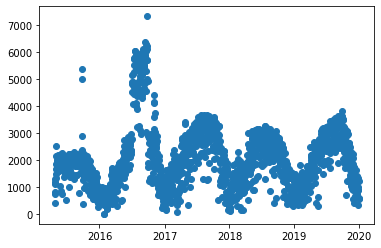

In [61]:
plt.scatter(PhillyWeatherCount.Date, PhillyWeatherCount.Count)

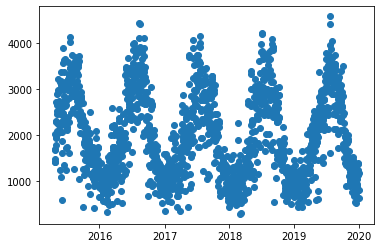

In [62]:
plt.scatter(PhillyWeatherCount.Date, np.expm1(ols.predict(X_scaled)))

In [78]:
PhillyWeatherCount.sort_values('Count')[['Date','Count']].head(15)

,Date,Count
1025,2016-01-25,1
1026,2016-01-26,6
619,2017-03-14,71
368,2018-01-04,115
444,2018-03-21,128
370,2018-01-06,153
553,2017-01-07,153
430,2018-03-07,155
540,2017-12-25,158
1045,2016-02-14,178


In [64]:
# training a model on the more recent data where a clear pattern is emerging gives us much more accurate predictions 

X_recent = PhillyWeatherCount[PhillyWeatherCount['Year'] >= 2017].iloc[:, [6,
#                                7,9,
                                10,
#                                13,
#                                15,
#                                17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,
                                44]]

In [65]:
Y_recent = PhillyWeatherCount[PhillyWeatherCount['Year'] >= 2017][['Count']]

In [66]:
X_recent_scaled = scale(X_recent)

In [67]:
Y_recent_scaled = np.log1p(Y_recent)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_recent_scaled, Y_recent_scaled)

In [69]:
ols_recent = linear_model.LinearRegression()

In [79]:
cv_recent = cross_validate(ols_recent, X_recent_scaled, Y_recent_scaled, cv = 5, return_train_score = True, return_estimator = True)

In [83]:
cv_recent['test_score']

array([0.62627049, 0.65031093, 0.73971217, 0.69867778, 0.35542401])

In [84]:
cv_recent['train_score']

array([0.74305166, 0.75071523, 0.71991849, 0.71693874, 0.71283136])

In [70]:
ols_recent.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
ols_recent.score(X_test, Y_test)

0.7021096608241807

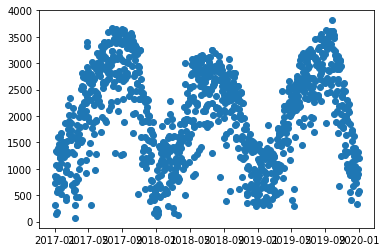

In [72]:
plt.scatter(PhillyWeatherCount[PhillyWeatherCount['Year'] >= 2017].Date, PhillyWeatherCount[PhillyWeatherCount['Year'] >= 2017].Count)

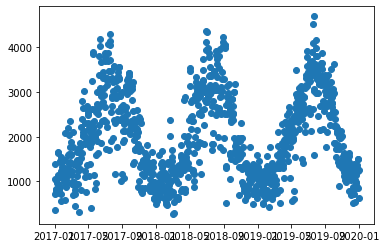

In [73]:
# provide the inverse of the log function so we can more accurately compare our models predictions to the true values 

plt.scatter(PhillyWeatherCount[PhillyWeatherCount['Year'] >= 2017].Date, np.expm1(ols_recent.predict(X_recent_scaled)))

In [74]:
y_pred = ols_recent.predict(X_test)

In [75]:
mse = MSE(np.expm1(y_pred), np.expm1(Y_test))

In [76]:
rmse = mse**0.5

In [77]:
# our root mean square error ultimately ends up being relatively low given the spread of the ride counts

print(mse)
print(rmse)

323875.00087119715
569.1001676956326
